In [1]:
# Analisi del tasso di Nascita in rapporto al GDP (Gross Domestic Product, analogo al PIL) tra Italia Spagna e Francia
# Eventualmente si può estendere ad altri Stati
# I dati sulle nascite sono stati ottenuti da: https://databank.worldbank.org/source/world-development-indicators
# I dati sul GDP sono stati presi dalla banca dati "DATASTREAM"

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creazione di un oggetto Dataframe di Pandas con i dati sulle nascite
dfBirth = pd.read_csv('\\Path\\to\\file\\Birth_rate_crude.csv')


In [2]:
# Check the data
# Verifico i dati
dfBirth.head()

,Country Name,Country Code,Series Name,Series Code,1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],...,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,Italy,ITA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,17.4,16.7,16.8,16.3,16.0,15.8,...,9.6,9.5,9.2,9.0,8.5,8.3,8.0,7.8,7.6,..
1,United Kingdom,GBR,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,16.6,16.2,16.1,14.9,13.9,13.1,...,12.7,12.9,12.8,12.8,12.1,12.0,11.9,11.8,11.4,..
2,Germany,DEU,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,14.7,13.4,12.9,11.5,10.3,10.2,...,8.1,8.3,8.3,8.4,8.5,8.8,9.0,9.6,9.5,..
3,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,17.9,18.4,17.2,15.6,14.8,14.8,...,13.5,13.0,12.7,12.6,12.4,12.5,12.4,12.2,11.8,..
4,Spain,ESP,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,19.9,19.5,19.6,19.4,19.2,19.5,...,10.6,10.4,10.1,9.7,9.1,9.2,9.0,8.8,8.4,..


In [3]:
# DataFrame Object with GDP data, there is a need to preprocess the data because they are subdivided by a quarter of year
# Creazione di un oggetto Dataframe di Pandas con i dati sul GDP
# Sarà necessaria una ulteriore elaborazione sui dati, perchè sono suddivisi per trimestre, a noi servono annuali

dfGDP = pd.read_csv('\\Path\\to\\file\\GDP.csv')
dfGDP.head()


,NOME?,US GDP (AR) CURA,ES GDP CURA,IT GDP (WDA) CURA,FR GDP (CUR) CURA,BD GDP (CAL ADJ) (PAN BD FROM 1991) CURA
0,Q3 2009,"14420,312",268666.0,"393563,3",482384.0,"613,136"
1,Q4 2009,"14628,021",268735.0,"396110,4",487653.0,"619,755"
2,Q1 2010,"14721,35",269646.0,"395236,6",491424.0,"625,243"
3,Q2 2010,"14926,098",270086.0,"399294,8",495908.0,"635,292"
4,Q3 2010,"15079,917",270520.0,"401849,5",501012.0,"645,544"


In [4]:
# Pulizia del Dataset
temp = dfGDP

In [5]:
temp.tail()

,NOME?,US GDP (AR) CURA,ES GDP CURA,IT GDP (WDA) CURA,FR GDP (CUR) CURA,BD GDP (CAL ADJ) (PAN BD FROM 1991) CURA
36,Q3 2018,"20749,752",303220.0,"438458,5",590038.0,"837,295"
37,Q4 2018,"20897,804",306236.0,"439629,7",594254.0,"847,126"
38,Q1 2019,"21098,827",307426.0,"442141,5",599382.0,"852,167"
39,Q2 2019,"21337,898",311139.0,NaN,602805.0,"856,383"
40,Q3 2019,NaN,NaN,NaN,NaN,NaN


In [6]:
# Rename the column
# Rinomino la colonna "NOME?"" in "Anno"
temp = temp.rename(columns={"NOME?": "Anno"})
temp.tail()

,Anno,US GDP (AR) CURA,ES GDP CURA,IT GDP (WDA) CURA,FR GDP (CUR) CURA,BD GDP (CAL ADJ) (PAN BD FROM 1991) CURA
36,Q3 2018,"20749,752",303220.0,"438458,5",590038.0,"837,295"
37,Q4 2018,"20897,804",306236.0,"439629,7",594254.0,"847,126"
38,Q1 2019,"21098,827",307426.0,"442141,5",599382.0,"852,167"
39,Q2 2019,"21337,898",311139.0,NaN,602805.0,"856,383"
40,Q3 2019,NaN,NaN,NaN,NaN,NaN


In [7]:
# Remove the Qn from the column Anno
# Elimino dalla colonna Anno i valori 'Q1 ', 'Q2 ', 'Q3 ', 'Q4 '
temp["Anno"] = temp["Anno"].str.replace('Q. ','')
temp["Anno"].tail()

36    2018
37    2018
38    2019
39    2019
40    2019
Name: Anno, dtype: object

In [8]:
temp.tail()

,Anno,US GDP (AR) CURA,ES GDP CURA,IT GDP (WDA) CURA,FR GDP (CUR) CURA,BD GDP (CAL ADJ) (PAN BD FROM 1991) CURA
36,2018,"20749,752",303220.0,"438458,5",590038.0,"837,295"
37,2018,"20897,804",306236.0,"439629,7",594254.0,"847,126"
38,2019,"21098,827",307426.0,"442141,5",599382.0,"852,167"
39,2019,"21337,898",311139.0,NaN,602805.0,"856,383"
40,2019,NaN,NaN,NaN,NaN,NaN


In [9]:
temp = temp.dropna()

In [10]:
temp

,Anno,US GDP (AR) CURA,ES GDP CURA,IT GDP (WDA) CURA,FR GDP (CUR) CURA,BD GDP (CAL ADJ) (PAN BD FROM 1991) CURA
0,2009,"14420,312",268666.0,"393563,3",482384.0,"613,136"
1,2009,"14628,021",268735.0,"396110,4",487653.0,"619,755"
2,2010,"14721,35",269646.0,"395236,6",491424.0,"625,243"
3,2010,"14926,098",270086.0,"399294,8",495908.0,"635,292"
4,2010,"15079,917",270520.0,"401849,5",501012.0,"645,544"
5,2010,"15240,843",270683.0,406407,505295.0,"652,559"
6,2011,"15285,828",269393.0,"408560,1",511405.0,"665,539"
7,2011,"15496,189",268449.0,410377,512878.0,"668,073"
8,2011,"15591,85",266860.0,"410117,1",515210.0,"676,841"
9,2011,"15796,46",265747.0,"408912,8",518094.0,"679,09"


In [11]:
# Change the commas with dots
# Alcuni valori decimali presentano una virgola, per uniformarli e renderli calcolabili decido di sostire la
# virgola con un punto
temp = temp.replace(',','.', regex=True)
temp.head()

,Anno,US GDP (AR) CURA,ES GDP CURA,IT GDP (WDA) CURA,FR GDP (CUR) CURA,BD GDP (CAL ADJ) (PAN BD FROM 1991) CURA
0,2009,14420.312,268666.0,393563.3,482384.0,613.136
1,2009,14628.021,268735.0,396110.4,487653.0,619.755
2,2010,14721.35,269646.0,395236.6,491424.0,625.243
3,2010,14926.098,270086.0,399294.8,495908.0,635.292
4,2010,15079.917,270520.0,401849.5,501012.0,645.544


In [12]:
# Rename columns
# Rinomino le colonne
#temp = temp.rename({1: "US_GDP", 2: "ES_GDP"})#, axis='columns')
temp.columns = ["Anno", "US_GDP", "ES_GDP", "IT_GDP", "FR_GDP", "BD_GDP"]
temp.head()

,Anno,US_GDP,ES_GDP,IT_GDP,FR_GDP,BD_GDP
0,2009,14420.312,268666.0,393563.3,482384.0,613.136
1,2009,14628.021,268735.0,396110.4,487653.0,619.755
2,2010,14721.35,269646.0,395236.6,491424.0,625.243
3,2010,14926.098,270086.0,399294.8,495908.0,635.292
4,2010,15079.917,270520.0,401849.5,501012.0,645.544


In [13]:
# Check data types
# Controllo il tipo dei dati nelle colonne
temp.dtypes

Anno       object
US_GDP     object
ES_GDP    float64
IT_GDP     object
FR_GDP    float64
BD_GDP     object
dtype: object

In [14]:
# Change datatype to numeric.
# Rendo i campi di tipo numerico, per permettermi calcoli su di essi
# df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)

temp[["US_GDP", "IT_GDP", "BD_GDP"]] = temp[["US_GDP", "IT_GDP", "BD_GDP"]].apply(pd.to_numeric)
temp.dtypes

Anno       object
US_GDP    float64
ES_GDP    float64
IT_GDP    float64
FR_GDP    float64
BD_GDP    float64
dtype: object

In [15]:
# Sum value of quarter, uniform data by year
# Sommo i valori dei trimestri di ogni anno, in modo da ottenere valori annuali
#temp_grouped = temp.groupby("Anno")
#tempYear = temp.groupby("Anno").sum().reset_index()
tempYear = temp.groupby("Anno").sum(axis=1)
tempYear.head()

,US_GDP,ES_GDP,IT_GDP,FR_GDP,BD_GDP
Anno,,,,,
2009,29048.333,537401.0,789673.7,970037.0,1232.891
2010,59968.208,1080935.0,1602787.9,1993639.0,2558.638
2011,62170.327,1070449.0,1637967.0,2057587.0,2689.543
2012,64788.029,1039815.0,1613207.1,2089205.0,2746.414
2013,67139.402,1025693.0,1604216.0,2117951.0,2815.668


In [16]:
# Remove 2009 row, because there is a lack of data
# Rimuovo la riga relativa all'anno 2009 che ha un valore fuorviante, poichè aveva rilevazioni soltanto di 2 trimestri
#tempYear = tempYear.reset_index()
# df.drop(df.index[0])
tempYear = tempYear.drop('2009')
#tempYear = tempYear.drop(tempYear.index[0])
tempYear.head()

,US_GDP,ES_GDP,IT_GDP,FR_GDP,BD_GDP
Anno,,,,,
2010,59968.208,1080935.0,1602787.9,1993639.0,2558.638
2011,62170.327,1070449.0,1637967.0,2057587.0,2689.543
2012,64788.029,1039815.0,1613207.1,2089205.0,2746.414
2013,67139.402,1025693.0,1604216.0,2117951.0,2815.668
2014,70109.033,1037820.0,1622705.7,2151183.0,2931.661


In [17]:
# Remove last column, I don't need it
# Rimuovo l'ultima colonna, non verrà utilizzata
# df.drop('reports', axis=1)
tempYear = tempYear.drop('BD_GDP', axis=1)
tempYear.head()

,US_GDP,ES_GDP,IT_GDP,FR_GDP
Anno,,,,
2010,59968.208,1080935.0,1602787.9,1993639.0
2011,62170.327,1070449.0,1637967.0,2057587.0
2012,64788.029,1039815.0,1613207.1,2089205.0
2013,67139.402,1025693.0,1604216.0,2117951.0
2014,70109.033,1037820.0,1622705.7,2151183.0


In [18]:
# reset index 
# Rinomino il Dataframe
GDPYear = tempYear.reset_index()

In [19]:
# Transpose the dataframe
# Pulizia dei dati dfBirth, riguardanti le nascite, adattando il dataFrame a quello relativo ai GDP
dfBirth = dfBirth.T

In [20]:
dfBirth.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
Country Name,Italy,United Kingdom,Germany,United States,Spain,China,France,Australia,NaN,NaN,NaN,Data from database: World Development Indicators,Last Updated: 07/10/2019
Country Code,ITA,GBR,DEU,USA,ESP,CHN,FRA,AUS,NaN,NaN,NaN,NaN,NaN
Series Name,"Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)",NaN,NaN,NaN,NaN,NaN
Series Code,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,NaN,NaN,NaN,NaN,NaN
1969 [YR1969],17.4,16.6,14.7,17.9,19.9,34.11,17.3,20.4,NaN,NaN,NaN,NaN,NaN


In [21]:
dfBirth.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
Country Name,Italy,United Kingdom,Germany,United States,Spain,China,France,Australia,NaN,NaN,NaN,Data from database: World Development Indicators,Last Updated: 07/10/2019
Country Code,ITA,GBR,DEU,USA,ESP,CHN,FRA,AUS,NaN,NaN,NaN,NaN,NaN
Series Name,"Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)",NaN,NaN,NaN,NaN,NaN
Series Code,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,NaN,NaN,NaN,NaN,NaN
1969 [YR1969],17.4,16.6,14.7,17.9,19.9,34.11,17.3,20.4,NaN,NaN,NaN,NaN,NaN
1970 [YR1970],16.7,16.2,13.4,18.4,19.5,33.43,17,20.6,NaN,NaN,NaN,NaN,NaN
1971 [YR1971],16.8,16.1,12.9,17.2,19.6,30.65,16.7,21.4,NaN,NaN,NaN,NaN,NaN
1972 [YR1972],16.3,14.9,11.5,15.6,19.4,29.77,16.3,20.1,NaN,NaN,NaN,NaN,NaN
1973 [YR1973],16,13.9,10.3,14.8,19.2,27.93,15.9,18.5,NaN,NaN,NaN,NaN,NaN
1974 [YR1974],15.8,13.1,10.2,14.8,19.5,24.82,15.5,17.8,NaN,NaN,NaN,NaN,NaN


In [22]:
dfBirth.reset_index()
dfBirth.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
Country Name,Italy,United Kingdom,Germany,United States,Spain,China,France,Australia,NaN,NaN,NaN,Data from database: World Development Indicators,Last Updated: 07/10/2019
Country Code,ITA,GBR,DEU,USA,ESP,CHN,FRA,AUS,NaN,NaN,NaN,NaN,NaN
Series Name,"Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)",NaN,NaN,NaN,NaN,NaN
Series Code,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,NaN,NaN,NaN,NaN,NaN
1969 [YR1969],17.4,16.6,14.7,17.9,19.9,34.11,17.3,20.4,NaN,NaN,NaN,NaN,NaN


In [24]:
dfBirth = pd.read_csv('\\Path\\to\\file\\Birth_rate_crude.csv')
dfBirth = dfBirth.T
#dfBirth.head()

In [25]:
#temp["Anno"] = temp["Anno"].str.replace('Q. ','')
#dfBirth["index"] = dfBirth["index"].str.replace('[*]', '')
#dfBirth[0] = dfBirth[0].str.replace('[*]', '', regex=True)
dfBirth = pd.read_csv('\\Path\\to\\file\\Birth_rate_crude.csv')
dfBirth = dfBirth.T

dfBirth = dfBirth.reset_index()
#dfBirth[0] = dfBirth[0].str.strip('[] \n\t')
#dfBirth["index"] = dfBirth["index"].str.strip('[]YR.... \n\t')
#\((.*?)\)
#dfBirth["index"] = dfBirth["index"].str.replace(r'\[[.*]\]', '')
#dfBirth["index"] = dfBirth["index"].str.replace('[[YR...]', '', regex=True)
#dfBirth["index"] = dfBirth["index"].str.replace('\[[.*]\]', '', regex=True)
#dfBirth["index"] = dfBirth["index"].str.strip('')

dfBirth["index"] = dfBirth["index"].str.replace(r'\[.*', '')

#str.strip('[] \n\t')
dfBirth.head(10)

,index,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Country Name,Italy,United Kingdom,Germany,United States,Spain,China,France,Australia,NaN,NaN,NaN,Data from database: World Development Indicators,Last Updated: 07/10/2019
1,Country Code,ITA,GBR,DEU,USA,ESP,CHN,FRA,AUS,NaN,NaN,NaN,NaN,NaN
2,Series Name,"Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)",NaN,NaN,NaN,NaN,NaN
3,Series Code,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN,NaN,NaN,NaN,NaN,NaN
4,1969,17.4,16.6,14.7,17.9,19.9,34.11,17.3,20.4,NaN,NaN,NaN,NaN,NaN
5,1970,16.7,16.2,13.4,18.4,19.5,33.43,17,20.6,NaN,NaN,NaN,NaN,NaN
6,1971,16.8,16.1,12.9,17.2,19.6,30.65,16.7,21.4,NaN,NaN,NaN,NaN,NaN
7,1972,16.3,14.9,11.5,15.6,19.4,29.77,16.3,20.1,NaN,NaN,NaN,NaN,NaN
8,1973,16,13.9,10.3,14.8,19.2,27.93,15.9,18.5,NaN,NaN,NaN,NaN,NaN
9,1974,15.8,13.1,10.2,14.8,19.5,24.82,15.5,17.8,NaN,NaN,NaN,NaN,NaN


In [26]:
#dfBirthC = DataFrame(dfBirth, columns=dfBirth[1])
#dfBirthC = dfBirth[['index', 'Italy', 'GBR']].copy()
dfBirthC = dfBirth.iloc[4:,:8]
dfBirthC.columns=['Anno', 'ITA', 'GBR', 'DEU', 'USA', 'ESP', 'CHN', 'FRA']
dfBirthC.head(10)
dfBirthC.dtypes

Anno    object
ITA     object
GBR     object
DEU     object
USA     object
ESP     object
CHN     object
FRA     object
dtype: object

In [28]:
#dfBirthC = dfBirthC.reset_index()
#dfBirthC = dfBirthC.set_index("Anno")
dfBirthC.head()

,Anno,ITA,GBR,DEU,USA,ESP,CHN,FRA
4,1969,17.4,16.6,14.7,17.9,19.9,34.11,17.3
5,1970,16.7,16.2,13.4,18.4,19.5,33.43,17
6,1971,16.8,16.1,12.9,17.2,19.6,30.65,16.7
7,1972,16.3,14.9,11.5,15.6,19.4,29.77,16.3
8,1973,16,13.9,10.3,14.8,19.2,27.93,15.9


In [29]:
GDPYear.head()

,Anno,US_GDP,ES_GDP,IT_GDP,FR_GDP
0,2010,59968.208,1080935.0,1602787.9,1993639.0
1,2011,62170.327,1070449.0,1637967.0,2057587.0
2,2012,64788.029,1039815.0,1613207.1,2089205.0
3,2013,67139.402,1025693.0,1604216.0,2117951.0
4,2014,70109.033,1037820.0,1622705.7,2151183.0


In [30]:
GDPYear.dtypes


Anno       object
US_GDP    float64
ES_GDP    float64
IT_GDP    float64
FR_GDP    float64
dtype: object

In [31]:
dfBirthC.dtypes

Anno    object
ITA     object
GBR     object
DEU     object
USA     object
ESP     object
CHN     object
FRA     object
dtype: object

In [32]:
#Anno
dfBirthC["Anno"].tail()

49    2014 
50    2015 
51    2016 
52    2017 
53    2018 
Name: Anno, dtype: object

In [33]:
GDPYear["Anno"]

0    2010
1    2011
2    2012
3    2013
4    2014
5    2015
6    2016
7    2017
8    2018
9    2019
Name: Anno, dtype: object

In [34]:
dfBirthC

,Anno,ITA,GBR,DEU,USA,ESP,CHN,FRA
4,1969,17.4,16.6,14.7,17.9,19.9,34.11,17.3
5,1970,16.7,16.2,13.4,18.4,19.5,33.43,17
6,1971,16.8,16.1,12.9,17.2,19.6,30.65,16.7
7,1972,16.3,14.9,11.5,15.6,19.4,29.77,16.3
8,1973,16,13.9,10.3,14.8,19.2,27.93,15.9
9,1974,15.8,13.1,10.2,14.8,19.5,24.82,15.5
10,1975,14.9,12.4,9.9,14.6,18.7,23.01,15
11,1976,14,12,10.2,14.6,18.7,19.91,14.6
12,1977,13.2,11.7,10.3,15.1,18,18.93,14.3
13,1978,12.6,12.2,10.4,15,17.3,18.25,14.1


In [35]:
GDPYear

,Anno,US_GDP,ES_GDP,IT_GDP,FR_GDP
0,2010,59968.208,1080935.0,1602787.9,1993639.0
1,2011,62170.327,1070449.0,1637967.0,2057587.0
2,2012,64788.029,1039815.0,1613207.1,2089205.0
3,2013,67139.402,1025693.0,1604216.0,2117951.0
4,2014,70109.033,1037820.0,1622705.7,2151183.0
5,2015,72899.121,1081165.0,1650931.4,2198385.0
6,2016,74860.162,1118743.0,1690539.2,2232852.0
7,2017,78077.694,1166319.0,1729238.1,2296513.0
8,2018,82320.892,1208248.0,1756614.2,2354466.0
9,2019,21098.827,307426.0,442141.5,599382.0


In [36]:
#.apply(pd.to_numeric)
GDPYear['Anno'] = GDPYear['Anno'].apply(pd.to_numeric)
dfBirthC['Anno'] = dfBirthC['Anno'].apply(pd.to_numeric)

In [37]:
dfBirthC.dtypes

Anno     int64
ITA     object
GBR     object
DEU     object
USA     object
ESP     object
CHN     object
FRA     object
dtype: object

In [38]:
GDPYear.dtypes

Anno        int64
US_GDP    float64
ES_GDP    float64
IT_GDP    float64
FR_GDP    float64
dtype: object

In [39]:
GDP_Birth = pd.merge(dfBirthC, GDPYear)#, on='Anno')
GDP_Birth.replace('..',np.nan, inplace=True)#, regex=True)
GDP_Birth.tail()

,Anno,ITA,GBR,DEU,USA,ESP,CHN,FRA,US_GDP,ES_GDP,IT_GDP,FR_GDP
4,2014,8.3,12.0,8.8,12.5,9.2,12.37,12.4,70109.033,1037820.0,1622705.7,2151183.0
5,2015,8.0,11.9,9.0,12.4,9.0,12.07,12.0,72899.121,1081165.0,1650931.4,2198385.0
6,2016,7.8,11.8,9.6,12.2,8.8,12.95,11.7,74860.162,1118743.0,1690539.2,2232852.0
7,2017,7.6,11.4,9.5,11.8,8.4,12.43,11.4,78077.694,1166319.0,1729238.1,2296513.0
8,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82320.892,1208248.0,1756614.2,2354466.0


In [40]:
# Unisco le due tabelle
#dfBirthC = dfBirthC.reset_index()
#GDPYear = GDPYear.reset_index()
#GDP_Birth = pd.merge(dfBirthC, GDPYear)#, on='Anno')
#GDP_Birth.replace('..','NaN', inplace=True)#, regex=True)
GDP_Birth_cl = GDP_Birth.dropna()#(how='all', axis=0)#, inplace=True)#(how='all')
GDP_Birth_cl
#pd.merge(dfBirthC, GDPYear, on='Anno')
#dfBirthC.join(GDPYear, on='Anno')

,Anno,ITA,GBR,DEU,USA,ESP,CHN,FRA,US_GDP,ES_GDP,IT_GDP,FR_GDP
0,2010,9.5,12.9,8.3,13.0,10.4,11.90,12.9,59968.208,1080935.0,1602787.9,1993639.0
1,2011,9.2,12.8,8.3,12.7,10.1,11.93,12.7,62170.327,1070449.0,1637967.0,2057587.0
2,2012,9.0,12.8,8.4,12.6,9.7,12.10,12.6,64788.029,1039815.0,1613207.1,2089205.0
3,2013,8.5,12.1,8.5,12.4,9.1,12.08,12.4,67139.402,1025693.0,1604216.0,2117951.0
4,2014,8.3,12.0,8.8,12.5,9.2,12.37,12.4,70109.033,1037820.0,1622705.7,2151183.0
5,2015,8.0,11.9,9.0,12.4,9.0,12.07,12.0,72899.121,1081165.0,1650931.4,2198385.0
6,2016,7.8,11.8,9.6,12.2,8.8,12.95,11.7,74860.162,1118743.0,1690539.2,2232852.0
7,2017,7.6,11.4,9.5,11.8,8.4,12.43,11.4,78077.694,1166319.0,1729238.1,2296513.0


In [41]:
# DataFrame about Italy
# Dataframe relativo all'Italia
dfITA = GDP_Birth_cl[['Anno', 'ITA', 'IT_GDP']]
dfITA

,Anno,ITA,IT_GDP
0,2010,9.5,1602787.9
1,2011,9.2,1637967.0
2,2012,9.0,1613207.1
3,2013,8.5,1604216.0
4,2014,8.3,1622705.7
5,2015,8.0,1650931.4
6,2016,7.8,1690539.2
7,2017,7.6,1729238.1


In [42]:
# Dataframe relativo agli US
dfUS = GDP_Birth_cl[['Anno', 'USA', 'US_GDP']]
dfUS

,Anno,USA,US_GDP
0,2010,13.0,59968.208
1,2011,12.7,62170.327
2,2012,12.6,64788.029
3,2013,12.4,67139.402
4,2014,12.5,70109.033
5,2015,12.4,72899.121
6,2016,12.2,74860.162
7,2017,11.8,78077.694


In [43]:
# Dataframe relativo alla Spagna
dfES = GDP_Birth_cl[['Anno', 'ESP', 'ES_GDP']]
dfES

,Anno,ESP,ES_GDP
0,2010,10.4,1080935.0
1,2011,10.1,1070449.0
2,2012,9.7,1039815.0
3,2013,9.1,1025693.0
4,2014,9.2,1037820.0
5,2015,9.0,1081165.0
6,2016,8.8,1118743.0
7,2017,8.4,1166319.0


In [44]:
# Dataframe relativo alla Francia
dfFR = GDP_Birth_cl[['Anno', 'FRA', 'FR_GDP']]
dfFR

,Anno,FRA,FR_GDP
0,2010,12.9,1993639.0
1,2011,12.7,2057587.0
2,2012,12.6,2089205.0
3,2013,12.4,2117951.0
4,2014,12.4,2151183.0
5,2015,12.0,2198385.0
6,2016,11.7,2232852.0
7,2017,11.4,2296513.0


In [45]:
dfITA

,Anno,ITA,IT_GDP
0,2010,9.5,1602787.9
1,2011,9.2,1637967.0
2,2012,9.0,1613207.1
3,2013,8.5,1604216.0
4,2014,8.3,1622705.7
5,2015,8.0,1650931.4
6,2016,7.8,1690539.2
7,2017,7.6,1729238.1


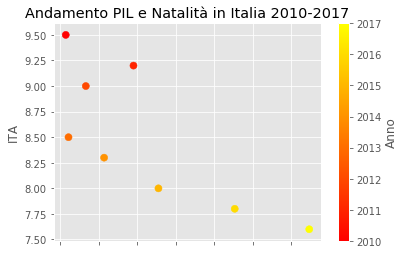

In [89]:
# Grafico per valutazioni:
import matplotlib, matplotlib.pyplot as plt
import pandas as pd

#Selezione dello stile
matplotlib.style.use("ggplot")
#dfITA.plot.scatter("IT_GDP", "ITA", c="Anno", s=50, cmap=plt.cm.autumn)
dfITA.plot.scatter("IT_GDP", "ITA", c="Anno", s=50, cmap=plt.cm.autumn)
#dfITA.plot.scatter("IT_GDP", "ITA", s=50)#, cmap=plt.cm.autumn)
#dfITAwo = dfITA.reset_index()
#dfITAwo.plot.scatter("IT_GDP", "ITA", c="Anno", s=50, cmap=plt.cm.Reds)
plt.title("Andamento PIL e Natalità in Italia 2010-2017")
#plt.tight_layout()
plt.savefig("./img/scatterPlotIta.pdf")

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not Anno.

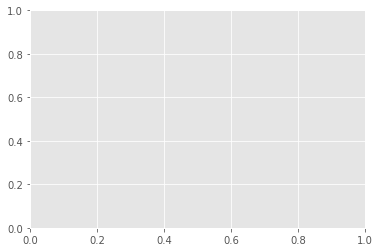

In [129]:
dfITA.plot.scatter("IT_GDP", "ITA", c="Anno", s=50, cmap=plt.cm.autumn)


In [96]:
GDPYear

,Anno,US_GDP,ES_GDP,IT_GDP,FR_GDP
0,2010,59968.208,1080935.0,1602787.9,1993639.0
1,2011,62170.327,1070449.0,1637967.0,2057587.0
2,2012,64788.029,1039815.0,1613207.1,2089205.0
3,2013,67139.402,1025693.0,1604216.0,2117951.0
4,2014,70109.033,1037820.0,1622705.7,2151183.0
5,2015,72899.121,1081165.0,1650931.4,2198385.0
6,2016,74860.162,1118743.0,1690539.2,2232852.0
7,2017,78077.694,1166319.0,1729238.1,2296513.0
8,2018,82320.892,1208248.0,1756614.2,2354466.0
9,2019,21098.827,307426.0,442141.5,599382.0


In [99]:
GDPYear

,US_GDP,ES_GDP,IT_GDP,FR_GDP
Anno,,,,
2010,59968.208,1080935.0,1602787.9,1993639.0
2011,62170.327,1070449.0,1637967.0,2057587.0
2012,64788.029,1039815.0,1613207.1,2089205.0
2013,67139.402,1025693.0,1604216.0,2117951.0
2014,70109.033,1037820.0,1622705.7,2151183.0
2015,72899.121,1081165.0,1650931.4,2198385.0
2016,74860.162,1118743.0,1690539.2,2232852.0
2017,78077.694,1166319.0,1729238.1,2296513.0
2018,82320.892,1208248.0,1756614.2,2354466.0


<Figure size 432x288 with 0 Axes>

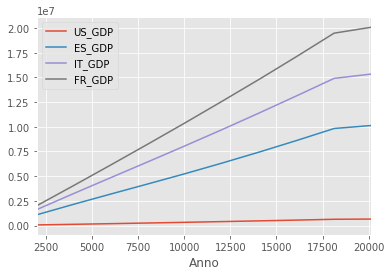

In [97]:
plt.figure()
dfPlot.plot()

<Figure size 432x288 with 0 Axes>

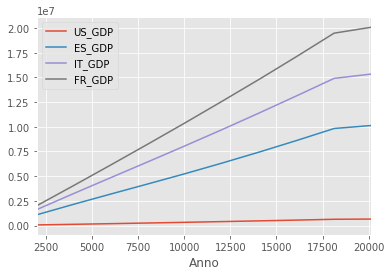

In [95]:
dfPlot = GDPYear.cumsum()
dfPlot = dfPlot.set_index("Anno")
plt.figure()
dfPlot.plot()

In [ ]:
# Diversi bug nei grafici TODO 

In [101]:
#Calcolo della correlazione tra PIL e Nascite
#dfLastYear.BTC.corr(dfLastYear.AUX)
dfITA.ITA.corr(dfITA.IT_GDP)

-0.7789015697721762

<Figure size 432x288 with 0 Axes>

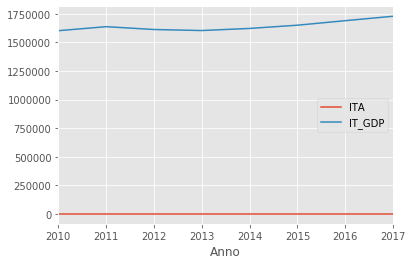

In [104]:
#dfPlot = GDPYear.cumsum()
#dfPlot = dfPlot.set_index("Anno")
#plt.figure()
#dfPlot.plot()
dfITA = dfITA.set_index("Anno")
plt.figure()
dfITA.plot()

In [130]:
#reset index
dfITAwoIndex = dfITA.reset_index()
dfITAwoIndex

,Anno,ITA,IT_GDP
0,2010,9.5,1602787.9
1,2011,9.2,1637967.0
2,2012,9.0,1613207.1
3,2013,8.5,1604216.0
4,2014,8.3,1622705.7
5,2015,8.0,1650931.4
6,2016,7.8,1690539.2
7,2017,7.6,1729238.1


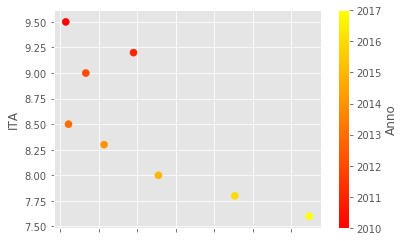

In [131]:
dfITAwoIndex.plot.scatter("IT_GDP", "ITA", c="Anno", s=50, cmap=plt.cm.autumn)

In [112]:
dfFR

,Anno,FRA,FR_GDP
0,2010,12.9,1993639.0
1,2011,12.7,2057587.0
2,2012,12.6,2089205.0
3,2013,12.4,2117951.0
4,2014,12.4,2151183.0
5,2015,12.0,2198385.0
6,2016,11.7,2232852.0
7,2017,11.4,2296513.0


In [114]:
dfFR.FRA.corr(dfFR.FR_GDP)

-0.9815106076645218

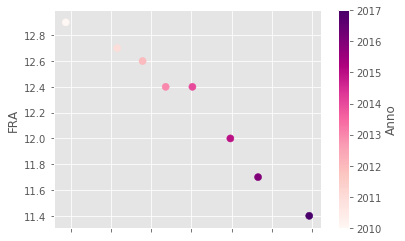

In [116]:
#dfITAwoIndex.plot.scatter("IT_GDP", "ITA", c="Anno", s=50, cmap=plt.cm.autumn)
dfFR.plot.scatter("FR_GDP", "FRA", c="Anno", s=50, cmap=plt.cm.RdPu)

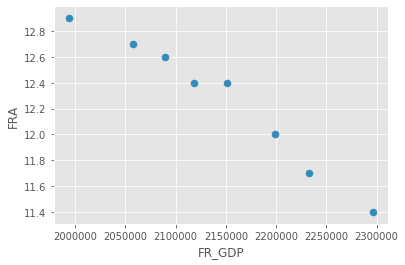

In [117]:
dfFR.plot.scatter("FR_GDP", "FRA", s=50)

In [118]:
dfES

,Anno,ESP,ES_GDP
0,2010,10.4,1080935.0
1,2011,10.1,1070449.0
2,2012,9.7,1039815.0
3,2013,9.1,1025693.0
4,2014,9.2,1037820.0
5,2015,9.0,1081165.0
6,2016,8.8,1118743.0
7,2017,8.4,1166319.0


In [119]:
dfES.ESP.corr(dfES.ES_GDP)

-0.4707996785072499

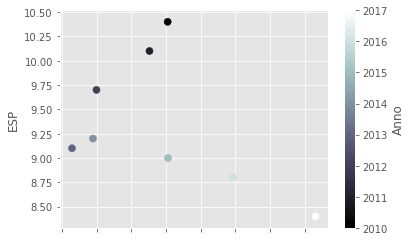

In [122]:
dfES.plot.scatter("ES_GDP", "ESP", c="Anno", s=50, cmap=plt.cm.bone)

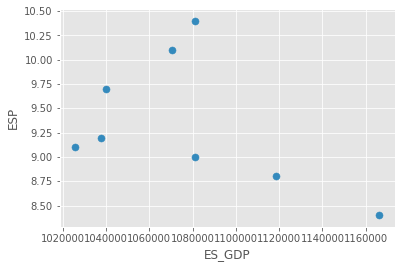

In [123]:
dfES.plot.scatter("ES_GDP", "ESP", s=50)

In [124]:
dfUS

,Anno,USA,US_GDP
0,2010,13.0,59968.208
1,2011,12.7,62170.327
2,2012,12.6,64788.029
3,2013,12.4,67139.402
4,2014,12.5,70109.033
5,2015,12.4,72899.121
6,2016,12.2,74860.162
7,2017,11.8,78077.694


In [125]:
dfUS.USA.corr(dfUS.US_GDP)

-0.9341635964664375

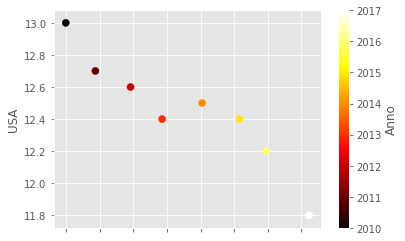

In [127]:
dfUS.plot.scatter("US_GDP", "USA", c="Anno", s=50, cmap=plt.cm.hot)

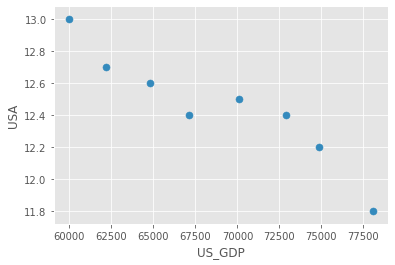

In [128]:
dfUS.plot.scatter("US_GDP", "USA", s=50)